# Identifying potential rice cultivation areas in Sierra Leone

* **Products used:**
[wofs_ls](https://explorer.digitalearth.africa/wofs_ls), 

### Background



### Description



## Getting started
**To run this analysis**, run all the cells in the notebook, starting with the "Load packages" cell.
***

### Load packages

In [1]:
import datacube
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from datacube.utils import geometry
from datacube.utils.geometry import Geometry, CRS
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.plotting import map_shapefile
from deafrica_tools.dask import create_local_dask_cluster

In [2]:
create_local_dask_cluster()

Client Scheduler: tcp://127.0.0.1:39719 Dashboard: /user/mickwelli/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 28.14 GB


In [3]:
dc = datacube.Datacube(app='rice_potential')

## Analysis parameters

The following cell sets important parameters for the analysis:

* `shp_path`: a location path to the vector file (e.g. `folder/input.shp`). 

In [4]:
shp_path = 'data/sierra_leone_admin.geojson'

### Load shapefile

We will also ensure the polygon is in WGS84 coordinates (`epsg=4326`) using the `to_crs()` method to make sure it can index the datacube correctly.

In [5]:
gdf = gpd.read_file(shp_path).to_crs('epsg:6933') 

In [6]:
gdf.explore()

In [7]:
print(np.unique(gdf.ADM2_NAME))

['Bo' 'Bombali' 'Bonthe' 'Kailahun' 'Kambia' 'Kenema' 'Koinadugu' 'Kono'
 'Moyamba' 'Port Loko' 'Pujehun' 'Tonkolili' 'Western Area Rural'
 'Western Area Urban']


In [8]:
query = {'resolution': (-30, 30),
         'output_crs': 'epsg:6933',
         'dask_chunks': dict(x=500,y=500)
         }

## Load crop mask

In [9]:
# Dictionary to save results
cm_results = {}

# Loop through polygons in geodataframe and extract satellite data
for index, row in gdf.iterrows():

    print(f'Feature: {index + 1}/{len(gdf)}')

    # Extract the feature's geometry as a datacube geometry object
    geom = Geometry(geom=row.geometry, crs=gdf.crs)

    # Update the query to include our geopolygon
    query.update({'geopolygon': geom})

    # Load landsat
    cm = dc.load(product='crop_mask_western',
                 measurements='mask',**query)

    # Generate a polygon mask to keep only data within the polygon
    mask = xr_rasterize(gdf.iloc[[index]], cm)

    # Mask dataset to set pixels outside the polygon to `NaN`
    cm = cm.where(mask)

    # Append results to a dictionary using the attribute
    # column as an key
    cm_results.update({str(row['ADM2_NAME']): cm})

Feature: 1/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 2/14
Feature: 3/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])
/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 4/14
Feature: 5/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 6/14
Feature: 7/14
Feature: 8/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 9/14
Feature: 10/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 11/14
Feature: 12/14
Feature: 13/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 14/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


In [10]:
# Dictionary to save results
wofs_results = {}

# Loop through polygons in geodataframe and extract satellite data
for index, row in gdf.iterrows():

    print(f'Feature: {index + 1}/{len(gdf)}')

    # Extract the feature's geometry as a datacube geometry object
    geom = Geometry(geom=row.geometry, crs=gdf.crs)

    # Update the query to include our geopolygon
    query.update({'geopolygon': geom})

    # Load landsat
    wofs = dc.load(product='wofs_ls_summary_alltime',
                   measurements = 'frequency',
             **query)

    # Generate a polygon mask to keep only data within the polygon
    mask = xr_rasterize(gdf.iloc[[index]], wofs)

    # Mask dataset to set pixels outside the polygon to `NaN`
    wofs = wofs.where(mask)

    # Append results to a dictionary using the attribute
    # column as an key
    wofs_results.update({str(row['ADM2_NAME']): wofs})

Feature: 1/14
Feature: 2/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])
/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 3/14
Feature: 4/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])
/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 5/14
Feature: 6/14
Feature: 7/14
Feature: 8/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 9/14
Feature: 10/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 11/14
Feature: 12/14
Feature: 13/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


Feature: 14/14


/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


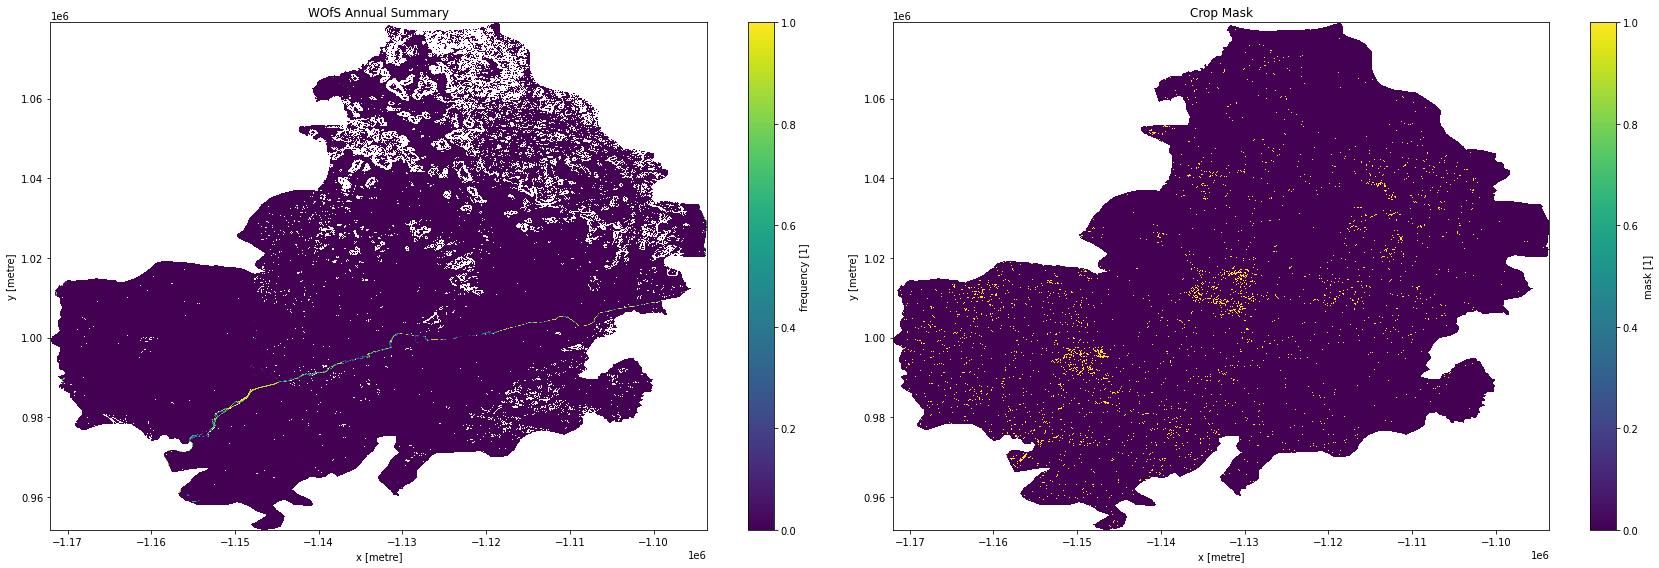

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
wofs_results['Bo'].frequency.plot(ax=axes[0])
cm_results['Bo'].mask.plot(ax=axes[1])

axes[0].set_title('WOfS Annual Summary')
axes[1].set_title('Crop Mask');

plt.tight_layout();

In [ ]:
rice_ds = ]

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Last modified:** Feb 2020

**Compatible `datacube` version:** 

In [ ]:
print(datacube.__version__)